<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab10_ProblemaGeneral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Taller de metodos computacionales

# Proyectiles con rozamiento y viento


Un proyectil es lanzado desde una posición (xo, yo), en presencia de viento y fuerza de fricción. Suponer que el efecto del viento sobre el proyectil es
el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Si $\vec{u} $ es la velocidad del viento y $\alpha$ el ángulo que hace direccion de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones de movimiento:

\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_y-u\sin \alpha )
\end{equation}


Para un proyectil lanzado con una rapidez $v_0$  y un ángulo $\theta_0$,
se enecuentra que la solución a la ecuación diferencial viene dada por:


Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


Problema.

1. Escribir un programa en python que resuelva la ecuacion diferencial del movimiento del proeyctil y comprobar la solución con la solución teórica. Para ello realice una grafica de la trayectoria y comprueba que la soución numérica coincide con la solucion teórica. Compruebe su solución para $b=0.05$, $theta=60^{o}$, $u=v_0/2$, $\alpha=\pi$, $vo=50m/s$


3. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numericamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

4. Construya una  gráfica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 80 grados

5. Realice un ajuste a la curva construida en el apartado anterior.

6. Se denomina ángulo crítico, aquel  ángulo para el cual el alcance máximo es cero.  Para ello, se pide resolver el sistema no lineal de ecuaciones para $t$ y $\theta$  con  $x=0$, $y=0$. Representar para $\theta=0.9\theta_c$, $\theta=\theta_c$, $\theta=1.1\theta_c$.

7. Construya la trayectoria seguida por la partícula para $\theta=10^{o}, 15^{o}, 20^{o}, ...45^{o}$.

8. Determine el máximo de cada unas de las trayectorias anteriores, y construya una gráfica de los máximos como función del ángulo.



 ## 1) Solución númerica

In [23]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import trapezoid
import matplotlib.pyplot as plt
import scipy.optimize as sc

In [24]:
def Rozamientox(Cin, t, b, u, alpha,g,theta):
    x0,Vx = Cin
    dxdt = [Vx,-b*(Vx-u*np.cos(alpha))]
    return dxdt

In [25]:
def Rozamientoy(Cin, t, b, u, alpha,g,theta):
    y0,Vy = Cin
    dxdt = [Vy,-g-b*(Vy-u*np.cos(alpha))]
    return dxdt

In [62]:
alpha= np.pi
theta=np.deg2rad(10)
b= 0.05
v0=50 #m/s
u=v0/2
g=9.8

In [27]:
Cinx=[0,v0*np.cos(theta)]
Ciny=[0,v0*np.sin(theta)]

In [28]:
t=np.linspace(0,10,1000)

In [29]:
solx = odeint(Rozamientox,Cinx,t,args=(b,u,alpha,g,theta))
soly = odeint(Rozamientoy,Ciny,t,args=(b,u,alpha,g,theta))

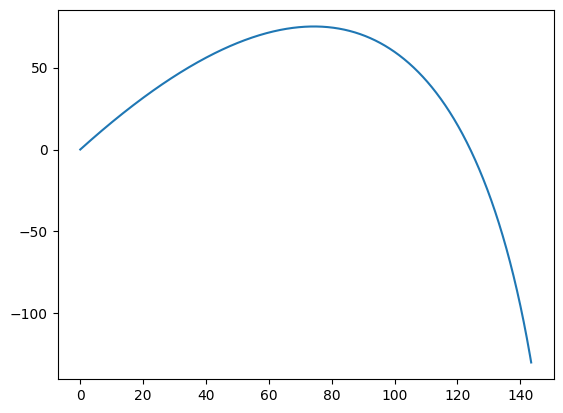

In [30]:
plt.plot(solx[::,0],soly[::,0])

##Solucion Teorica

\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}


\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

In [77]:


def posicionx(t,v0 , b, u, alpha,g,theta):
  x=np.zeros(len(t))
  for i in range(len(t)):
    x[i]=u*np.cos(alpha)*t[i]+1/b*(v0*np.cos(theta)-u*np.cos(alpha))*(1-np.exp(-b*t[i]))
  return x

In [78]:

def posiciony(t, v0, b, u, alpha, g, theta):
  y=np.zeros(len(t))
  for i in range(len(t)):
    y[i]=1/b*(g/b+v0*np.sin(theta)-u*np.sin(alpha))*(1-np.exp(-b*t[i]))-(g/b-u*np.sin(alpha))*t[i]
  return y

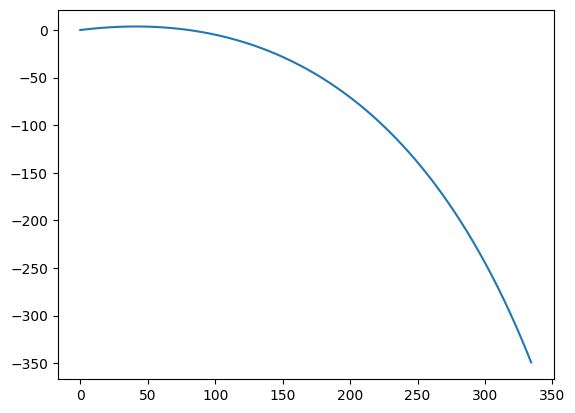

In [63]:
plt.plot(posicionx(t, v0, b, u, alpha, g, theta),posiciony(t,v0 , b, u, alpha,g,theta))

## 2)

In [34]:
theta1=np.deg2rad(45)

In [68]:
@np.vectorize

def f(t,theta):
  return (1/b)*((g/b)+v0*np.sin(theta)-u*np.sin(alpha))*(1-np.exp(-b*t))-((g/b)-u*np.sin(alpha))*t

In [36]:
h=lambda t,theta: u*np.cos(alpha)*t+1/b*(v0*np.cos(theta)-u*np.cos(alpha))*(1-np.exp(-b*t))

In [41]:
alcancemax=sc.newton(f,100,args=(theta1,))

In [40]:
h(alcancemax,theta1)

178.41981844694115

##3)

In [70]:
angulos=np.linspace(10,80,100)
angulos10=np.deg2rad(angulos)
def alcancemaximo(f,theta):
  alcance=sc.newton(f,100,args=(theta,))
  return h(alcance,theta)

In [72]:
R=np.zeros(len(angulos))
for i in range(len(angulos10)):
  R[i]=alcancemaximo(f,angulos10[i])

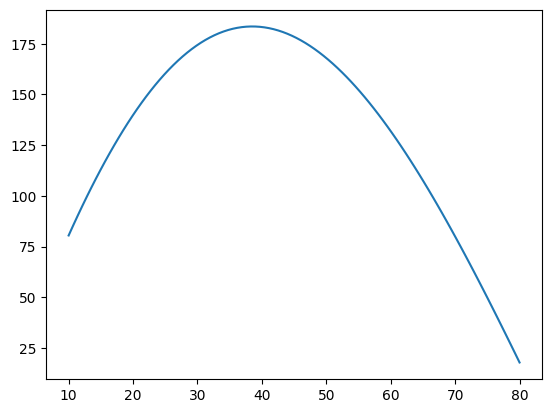

In [73]:
plt.plot(angulos,R)

##6)

In [100]:
angulos150=np.linspace(10,45,8)
angulosyandel150=np.deg2rad(angulos150)

In [96]:
angulosyandel150

array([0.17453293, 0.3296733 , 0.48481368, 0.63995406, 0.79509444,
       0.95023481, 1.10537519, 1.26051557, 1.41565595, 1.57079633])

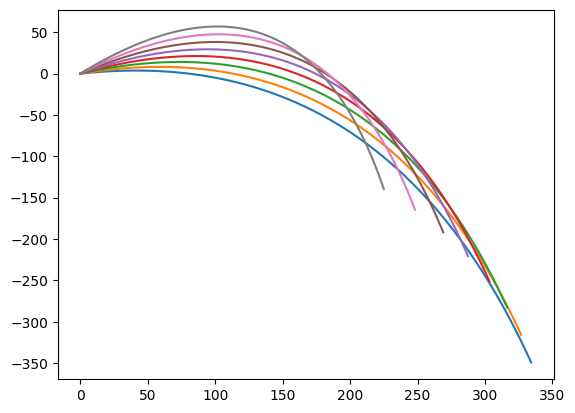

In [89]:
for j in range(len(angulos150)):
  plt.plot(posicionx(t,v0 , b, u, alpha,g,angulosyandel150[j]),posiciony(t,v0 , b, u, alpha,g,angulosyandel150[j]))


##7)

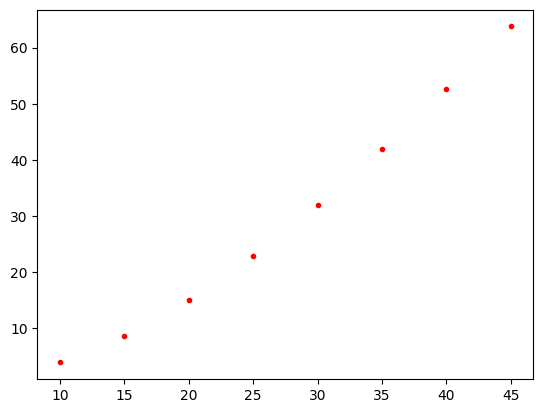

In [101]:
Hmax=np.zeros(len(angulosyandel150))
for i in range(len(angulosyandel150)):
  Hmax[i]=(v0**2)*(np.sin(angulosyandel150[i])**2)/(2*g)
  plt.plot(angulos150[i],Hmax[i],"r.")